改写为等价 Python 代码
```
ts=1:0.05:2; x0=1.6; h=0.2; x=1:h:2; n=length(x);
% [t,xx]=ode45(@ode2,ts,x0);
% plot(t,xx)
% rr=xx(length(xx));
y=x0;
for k=2:n
    yy=y(k-1)+h*(y(k-1)^3-exp(y(k-1))+x(k-1)-1);
    y(k)=y(k-1)+h*(y(k-1)^3-exp(y(k-1))+x(k-1)-1+yy^3-exp(yy)+x(k)-1)/2;
end
plot(x,y,'r');
```

# 1

In [3]:
import numpy as np
from scipy.sparse import diags

def cal_B_G_S(A):
    """求 G-S 迭代的迭代矩阵""" 
    D = np.diag(np.diag(A))
    U = -(np.triu(A) - D)
    L = -(np.tril(A) - D)
    D_sub_L_inv = np.linalg.inv(D - L)
    B_G_S = D_sub_L_inv @ U 
    
    return B_G_S

def gauss_sedeil(A, b, x0, tol, max_iter, verbose = True):
    x = x0.copy()

    # 求 D_sub_L_inv
    D = np.diag(np.diag(A))
    U = -(np.triu(A) - D)
    L = -(np.tril(A) - D)
    D_sub_L_inv = np.linalg.inv(D - L)

    for i in range(max_iter):
        # print(f"x^({i}) = {x}")

        x_new = D_sub_L_inv @ (U @ x + b)
        err = np.linalg.norm(x_new - x)
        
        x = x_new
        if  err < tol:
            if verbose: print(f"Converge after {i+1} iterations")
            break
        
    if verbose:
        print(f"x^({i+1}) = {x}")
        print(f"relative error = {err}")
    return x, err

order = 2
n = 50
diag = np.ones(n) * 2
subdiag = np.ones(n-1)
A = diags([subdiag, diag, subdiag] , [-1, 0, 1]).toarray()

# print(f"A = {A}")
cond_2_A = np.linalg.cond(A, p=order)
print(f"cond_2_A = {cond_2_A}")

B_G_S = cal_B_G_S(A)
# print(B_G_S)
# 求 B_G_S 的谱半径
rho_B_G_S = np.max(np.abs(np.linalg.eigvals(B_G_S)))
print(f"rho_B_G_S = {rho_B_G_S}")

b = np.ones(n)

x, err = gauss_sedeil(A=A,b=b,x0=np.zeros(n),tol=1e-6,max_iter=10,verbose = False)

print(x[4],x[17],x[26])

res_norm_1 = np.linalg.norm((A @ x - b), ord=1)

print(f"res_norm_1 = {res_norm_1}")

cond_2_A = 1053.4789912002955
rho_B_G_S = 0.9962102548359681
0.3281543254852295 0.24931016832124442 0.2500069297819607
res_norm_1 = 0.08947035611346166


# 2

In [42]:

import numpy as np
from scipy.integrate import solve_ivp

f = lambda t, y: y ** 3 - np.exp(y) + t - 1

sol = solve_ivp(
        fun=f,
        y0=[1.6],
        t_span=(1, 3),
        t_eval=[2],
        # dense_output=True
)

print(sol)
print(sol.y)

def improved_euler(f, y0 = 1, t0 = 0, h = 0.1, t_end = 1):
    t = np.arange(t0, t_end + 0.1 * h, h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n-1):
        y_expected = y[i] + h * f(t[i], y[i])
        y[i+1] = y[i] + h / 2 * (f(t[i], y[i]) + f(t[i+1], y_expected))
        print(t[i+1], y[i+1])
    return t, y

y0 = 1.6
t0 = 1
h = 0.2
t_end = 2

# 改进欧拉法
t_improved, y_improved = improved_euler(f, y0, t0, h, t_end)
print(f"t_improved = {t_improved}")
print(f"y_improved = {y_improved}")
improved_euler_value = y_improved[-1]
print(f"improved_euler_value = {improved_euler_value}")

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [2]
        y: [[ 5.768e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0
[[0.57679596]]
1.2 1.4085728650602474
1.4 1.1787923832343592
1.5999999999999999 0.9445757733278395
1.7999999999999998 0.7436230775122011
1.9999999999999998 0.5964682610674225
t_improved = [1.  1.2 1.4 1.6 1.8 2. ]
y_improved = [1.6        1.40857287 1.17879238 0.94457577 0.74362308 0.59646826]
improved_euler_value = 0.5964682610674225


1.9999999999999998 0.5964682610674225


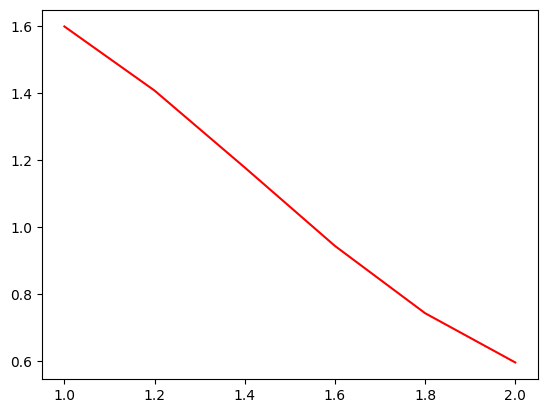

In [38]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 1.6
h = 0.2
x = np.arange(1, 2+ 0.5 * h, h)
n = len(x)

def ode2(y, t):
    return y**3 - np.exp(y) + t - 1

# [t, xx] = ode45(@ode2, ts, x0);
# plot(t, xx)
# rr = xx[-1]

y = np.zeros(n)
y[0] = x0
for k in range(1, n):
    yy = y[k-1] + h * ode2(y[k-1], x[k-1])
    f1 = ode2(y[k-1], x[k-1])
    f2 = ode2(yy, x[k])
    y[k] = y[k-1] + h * (f1 + f2) / 2

print(x[-1], y[-1])
plt.plot(x, y, 'r')
plt.show()


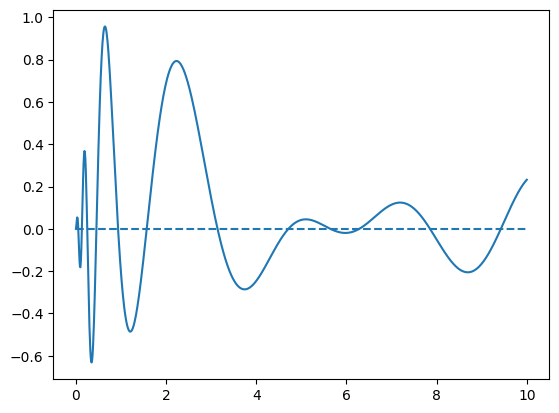

2.229038962274704


In [ ]:
from scipy.optimize import newton
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot as plt

# 计算积分并指定绝对误差小于 1e-15

def f(t):
    return np.cos(np.exp(3 / (t + 1))) * np.sin(2 * t)

ts = np.linspace(0, 10, 1000)
ys = f(ts)

plt.plot(ts, ys)
plt.hlines(0, 0, 10, linestyles='dashed')
plt.show()

def g(x):
    result, error = quad(f, 0, x, epsabs=1e-15)
    return result - 0.36

# 设置初始猜测值为 2，最大迭代次数为 8
result = newton(g, 2, maxiter=8)

print(result)


# 4

In [6]:
# BFGS

from scipy import optimize
import numpy as np

def fun(x):
    x1, x2 = x
    return 2 * x1 ** 2 + 2 * x2 **2 + 3 * x1 * x2 - 4 * x1 - 8 * x2

result = optimize.minimize(fun, [0, 0], method='BFGS')
print(result)
x = result.x
print(x)

# 最速下降法

import numpy as np

def fun(x):
    x1, x2 = x
    return 2 * x1 ** 2 + 2 * x2 **2 + 3 * x1 * x2 - 4 * x1 - 8 * x2

def grad(x):
    x1, x2 = x
    df_dx1 = 4 * x1 + 3 * x2 - 4
    df_dx2 = 4 * x2 + 3 * x1 - 8
    return np.array([df_dx1, df_dx2])

def backtracking_line_search(f, grad_f, x, p, alpha=0.3, beta=0.8):
    t = 1
    while f(x + t * p) > f(x) + alpha * t * np.dot(grad_f(x), p):
        t *= beta
    return t

x = np.array([0, 0])
alpha = 0.01
eps = 1e-2
max_iter = 1000
iter_count = 0
while True:
    iter_count += 1
    grad_f = grad(x)
    if np.linalg.norm(grad_f) < eps:
        break
    p = -grad_f
    t = backtracking_line_search(fun, grad, x, p)
    x = x + t * p
    if iter_count >= max_iter:
        break

print("Minimum value: ", fun(x))
print("Argmin: ", x)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -9.142857142857135
        x: [-1.143e+00  2.857e+00]
      nit: 5
      jac: [-1.192e-07  0.000e+00]
 hess_inv: [[ 5.720e-01 -4.292e-01]
            [-4.292e-01  5.721e-01]]
     nfev: 18
     njev: 6
[-1.14285723  2.85714291]
Minimum value:  -9.142845173723813
Argmin:  [-1.14018243  2.85344725]


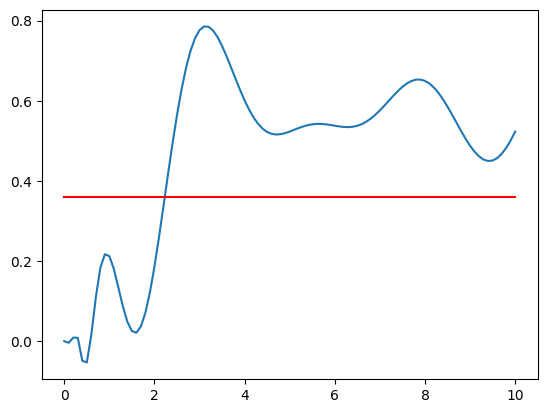

2.229038962274704


In [43]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

def f(x):
    return np.cos(np.exp(3 / (x + 1))) * np.sin(2 * x)

def calculate_z(x):
    z = []
    for k in range(len(x)):
        integral, _ = spi.quad(f, 0, x[k])
        z.append(integral)
    return z

def plot_graph(x, z):
    plt.plot(x, z)
    plt.plot(x, [0.36] * len(x), 'r')
    plt.show()

def calculate_xx():
    xx = [2]
    for k in range(8):
        ff, _ = spi.quad(f, 0, xx[k])
        ff -= 0.36
        fd = np.cos(np.exp(3 / (xx[k] + 1))) * np.sin(2 * xx[k])
        xx.append(xx[k] - ff / fd)
    return xx[8]

x = np.arange(0, 10.1, 0.1)
z = calculate_z(x)
plot_graph(x, z)
result = calculate_xx()
print(result)


# 5

In [29]:
# 5.1
import scipy as sp 

n = 28
df = n - 1
sigma = 4
mu_0 = 6
x_bar_sigma = sigma / np.sqrt(n)

x_bar = 6.56
# z_stat = (x_bar - mu_0) / x_bar_sigma

# N(mu=6,sigma=4)
H_0_dist = sp.stats.norm(loc=mu_0,scale=x_bar_sigma)
p = 2 * (1 - H_0_dist.cdf(x_bar))
print(f"p  = {p}")

# 5.2
alpha = 0.05
confidence = 1 - alpha

accepted_region = H_0_dist.interval(confidence=confidence)
print(f"accepted_region = {accepted_region}")

mu = 6.2
n_dist = sp.stats.norm(loc=mu,scale=x_bar_sigma)



beta_R = n_dist.cdf(accepted_region[1]) - n_dist.cdf(accepted_region[0])
print(f"beta_R = {beta_R}")

# 5.3
std_n_dist = sp.stats.norm(0,1)
for n in range(10000,12000):
    accepted_region_len = (std_n_dist.ppf(1 - alpha / 2) - std_n_dist.ppf(alpha / 2)) * sigma / np.sqrt(n)
    # print(f"n = {n}, accepted_region_len = {accepted_region_len} <= 0.15?")
    if accepted_region_len <= 0.15:
        print(f"n = {n}, accepted_region_len = {accepted_region_len} <= 0.15")
        break

p  = 0.4588084284002627
accepted_region = (4.518406490932507, 7.481593509067493)
beta_R = 0.941943063576035
n = 10927, accepted_region_len = 0.1499987384481967 <= 0.15


In [17]:
import numpy as np
from scipy.stats import norm

def ztest(data, mean_value, variance):
    """
    基于正态统计量进行一维数据均值双侧检验（在方差已知的情况下）

    参数：
    - data: 一维数组，表示观察值
    - mean_value: 指定的均值值
    - variance: 已知的方差值

    返回值：
    - statistic: 均值检验的统计值
    - p_value: 均值检验的p值

    """

    # 计算样本均值
    sample_mean = np.mean(data)

    # 计算样本大小
    sample_size = len(data)

    # 计算标准误差
    standard_error = np.sqrt(variance / sample_size)

    # 计算正态统计量
    z_statistic = (sample_mean - mean_value) / standard_error

    # 计算p值
    p_value = 2 * (1 - norm.cdf(np.abs(z_statistic)))

    result = (z_statistic, p_value)
    print(result)
    return result

mean_value = 6
variance = 16

# 计算样本均值
sample_mean = 6.56

# 计算样本大小
sample_size = 28

# 计算标准误差
standard_error = np.sqrt(variance / sample_size)

# 计算正态统计量
z_statistic = (sample_mean - mean_value) / standard_error

# 计算p值
p_value = 2 * (1 - norm.cdf(np.abs(z_statistic)))
print(f"p_value = {p_value}")

p_value = 0.4588084284002627


# 6

In [30]:
from scipy.optimize import newton
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot as plt

# 计算积分并指定绝对误差小于 1e-15

def f(t):
    return np.cos(np.exp(3 / (t + 1))) * np.sin(2 * t)

ts = np.linspace(0, 10, 1000)
ys = f(ts)

plt.plot(ts, ys)
plt.show()

def g(x):
    result, error = quad(f, 0, 1, epsabs=1e-15)
    return x**2 - 2

# 设置初始猜测值为 1.5，最大迭代次数为 8
result = newton(g, 1.5, maxiter=8)

print(result)


1.4142135623730951
